## **Exercise goal**
- look at correlations, eg. 
    - gross vs budget
- mostly look at what things impact the revenue of a film

## **Explore data**

#### import libraries and load data

In [1032]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1033]:
## load data
movies = pd.read_csv('movies.csv')

## view 1st 10 rows of data
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


#### explore the data some more to find out whether there's any missing data, etc

In [1034]:
# get the df info
movies.info()   # 7668 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [1035]:
# get the data stats
round(movies.describe(), 2)

,year,score,votes,budget,gross,runtime
count,7668.00,7665.00,7665.00,5.497000e+03,7.479000e+03,7664.00
mean,2000.41,6.39,88108.50,3.558988e+07,7.850054e+07,107.26
std,11.15,0.97,163323.76,4.145730e+07,1.657251e+08,18.58
min,1980.00,1.90,7.00,3.000000e+03,3.090000e+02,55.00
25%,1991.00,5.80,9100.00,1.000000e+07,4.532056e+06,95.00
50%,2000.00,6.50,33000.00,2.050000e+07,2.020576e+07,104.00
75%,2010.00,7.10,93000.00,4.500000e+07,7.601669e+07,116.00
max,2020.00,9.30,2400000.00,3.560000e+08,2.847246e+09,366.00


## **Handle duplicates**

#### check for duplicates in all columns

In [1036]:
# check for duplicates
movies[movies.duplicated() == True]

## no duplicates

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


#### check for duplicates in name and released columns

In [1037]:
# check for duplicates (name and released subset subset)
movies[movies.duplicated(subset=['name', 'released']) == True]

## no duplicates

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


#### check for duplicates in name column

In [1038]:
# check for duplicates (name and released subset subset)
duplicated_names_df = movies[movies.duplicated(subset=['name']) == True]
duplicated_names_df.sort_values(by=['name'])

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5712,A Nightmare on Elm Street,R,Crime,2010,"April 30, 2010 (United States)",5.2,95000.0,Samuel Bayer,Wesley Strick,Jackie Earle Haley,United States,35000000.0,1.156952e+08,New Line Cinema,95.0
7556,After the Wedding,PG-13,Drama,2019,"November 1, 2019 (United Kingdom)",6.3,6700.0,Bart Freundlich,Bart Freundlich,Julianne Moore,United States,NaN,2.790019e+06,Sony Pictures Classics,112.0
7481,Aladdin,PG,Adventure,2019,"May 24, 2019 (United States)",6.9,239000.0,Guy Ritchie,John August,Will Smith,United Kingdom,183000000.0,1.050694e+09,Walt Disney Pictures,128.0
7486,Anna,R,Action,2019,"June 21, 2019 (United States)",6.6,69000.0,Luc Besson,Luc Besson,Sasha Luss,France,NaN,3.162698e+07,Summit Entertainment,118.0
6390,Anna,R,Drama,2013,"January 24, 2014 (Spain)",6.5,22000.0,Jorge Dorado,Guy Holmes,Mark Strong,Spain,7000000.0,1.257142e+06,The Safran Company,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7147,Unforgettable,R,Drama,2017,"April 21, 2017 (United States)",5.1,15000.0,Denise Di Novi,Christina Hodson,Rosario Dawson,United States,12000000.0,1.776801e+07,DiNovi Pictures,100.0
7254,Venom,PG-13,Action,2018,"October 5, 2018 (United States)",6.7,387000.0,Ruben Fleischer,Jeff Pinkner,Tom Hardy,China,100000000.0,8.560852e+08,Avi Arad Productions,112.0
4799,Venom,R,Horror,2005,"September 16, 2005 (United States)",4.6,9700.0,Jim Gillespie,Flint Dille,Agnes Bruckner,United States,NaN,8.817790e+05,Dimension Films,87.0
3708,Where the Heart Is,PG-13,Comedy,2000,"April 28, 2000 (United States)",6.7,32000.0,Matt Williams,Lowell Ganz,Natalie Portman,United States,15000000.0,4.086372e+07,Twentieth Century Fox,120.0


In [1039]:
# investigate the duplicated_names dataframe further
movies[movies['name'].str.contains('|'.join(duplicated_names_df['name']))].sort_values(by=['name'])[movies['name']=='Venom']

## no duplicates

C:\Users\WangarY\AppData\Local\Temp\ipykernel_47588\259371535.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movies[movies['name'].str.contains('|'.join(duplicated_names_df['name']))].sort_values(by=['name'])[movies['name']=='Venom']


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7254,Venom,PG-13,Action,2018,"October 5, 2018 (United States)",6.7,387000.0,Ruben Fleischer,Jeff Pinkner,Tom Hardy,China,100000000.0,856085151.0,Avi Arad Productions,112.0
163,Venom,R,Horror,1981,"January 29, 1982 (United States)",5.8,2600.0,Piers Haggard,Alan Scholefield,Klaus Kinski,United Kingdom,NaN,5229643.0,Morison Film Group,92.0
4799,Venom,R,Horror,2005,"September 16, 2005 (United States)",4.6,9700.0,Jim Gillespie,Flint Dille,Agnes Bruckner,United States,NaN,881779.0,Dimension Films,87.0


## **Handle missing data**

In [1040]:
# get the % of missing data
round(movies.count() / len(movies)*100, 2)

name        100.00
rating       99.00
genre       100.00
year        100.00
released     99.97
score        99.96
votes        99.96
director    100.00
writer       99.96
star         99.99
country      99.96
budget       71.69
gross        97.54
company      99.78
runtime      99.95
dtype: float64

In [1041]:
# look at data where budget data is missing
movies[movies['budget'].isna()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,Leap,NaN,Drama,2020,"September 25, 2020 (United States)",6.7,903.0,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,NaN,25818882.0,NaN,135.0
7659,I Am Fear,Not Rated,Horror,2020,"March 3, 2020 (United States)",3.4,447.0,Kevin Shulman,Kevin Shulman,Kristina Klebe,United States,NaN,13266.0,Roxwell Films,87.0
7660,Aloha Surf Hotel,NaN,Comedy,2020,"November 5, 2020 (United States)",7.1,14.0,Stefan C. Schaefer,Stefan C. Schaefer,Augie Tulba,United States,NaN,NaN,Abominable Pictures,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0


In [1042]:
# get rid of data in variables we'll be analyzing (parwise deletion) - in this case, priortize budget (highest % of missing data)
movies_budget = movies.dropna(subset='budget', how='any')        # 5497 / 7668 left
# movies_budget

movies_budget_gross = movies.dropna(subset=['budget','gross'], how='any')       # 5436 / 7668 left
# movies_budget_gross

## **Reformat the data**

### *budget and gross columns*

#### convert gross and budget columns to int
        use the movies_budget_gross dataframe (no null values in both columns)

In [1043]:
# movies_budget_gross['gross'].astype(int, copy=False)
# movies_budget_gross['budget'].astype(int, copy=False)     # these don't work

movies_budget_gross['gross'] = movies_budget_gross['gross'].astype('int64')             # PS: don't use Int64 coz this will interfere with sns.regplot()
movies_budget_gross['budget'] = movies_budget_gross['budget'].astype('int64')

movies_budget_gross

C:\Users\WangarY\AppData\Local\Temp\ipykernel_47588\3304862285.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_budget_gross['gross'] = movies_budget_gross['gross'].astype('int64')             # PS: don't use Int64 coz this will interfere with sns.regplot()
C:\Users\WangarY\AppData\Local\Temp\ipykernel_47588\3304862285.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_budget_gross['budget'] = movies_budget_gross['budget'].astype('int64')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0


### *create columns from released column*

#### split the released column to display dates released and country in different columns

In [1044]:
# split the release column
movies_budget_gross[['release_date', 'release_country']] = movies_budget_gross['released'].str.split(' \(', n=1, expand=True)   # n=1-perform 1 split

# delete the ')' from the end of the string in the release country column
# movies_budget_gross['release_country'] = movies_budget_gross['release_country'].str.replace(pat=')', repl='')
movies_budget_gross['release_country'] = movies_budget_gross['release_country'].str[:-1]

# drop the released column from the original movies_budget_gross df
movies_budget_gross.drop(columns='released', inplace=True)

# convert the date column to datetime datatype
movies_budget_gross['release_date'] = pd.to_datetime(movies_budget_gross['release_date'])

movies_budget_gross

C:\Users\WangarY\AppData\Local\Temp\ipykernel_47588\3322827346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_budget_gross[['release_date', 'release_country']] = movies_budget_gross['released'].str.split(' \(', n=1, expand=True)   # n=1-perform 1 split
C:\Users\WangarY\AppData\Local\Temp\ipykernel_47588\3322827346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_budget_gross[['release_date', 'release_country']] = movies_budget_gross['released'].str.split(' \(', n=1, expand=True)   # n=

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020-01-17,United States
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020-02-14,United States
7650,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020-01-17,United States
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020-02-21,United States


#### create a release year column 

In [1045]:
# create a new column which is the year from release_date
movies_budget_gross['release_year'] = movies_budget_gross['release_date'].dt.year

movies_budget_gross

C:\Users\WangarY\AppData\Local\Temp\ipykernel_47588\2743539803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_budget_gross['release_year'] = movies_budget_gross['release_date'].dt.year


,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,United States,1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,United States,1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020-01-17,United States,2020
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020-02-14,United States,2020
7650,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020-01-17,United States,2020
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020-02-21,United States,2020


#### explore whether release_date year and year columns match 

In [1046]:
# view data where year is not = to year2 (extracted from release_date)
movies_budget_gross[movies_budget_gross['year'] != movies_budget_gross['release_year']]

# 713 rows where this is true

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
8,Superman II,PG,Action,1980,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981-06-19,United States,1981
11,The Gods Must Be Crazy,PG,Adventure,1980,7.3,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109.0,1984-10-26,United States,1984
21,Heaven's Gate,R,Adventure,1980,6.8,14000.0,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219.0,1981-04-24,United States,1981
33,Cattle Annie and Little Britches,PG,Drama,1980,6.1,604.0,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97.0,1981-04-24,United States,1981
96,The Evil Dead,NC-17,Horror,1981,7.5,192000.0,Sam Raimi,Sam Raimi,Bruce Campbell,United States,350000,2956630,Renaissance Pictures,85.0,1983-04-15,United States,1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7427,Stan & Ollie,PG,Biography,2018,7.2,34000.0,Jon S. Baird,Jeff Pope,Steve Coogan,United Kingdom,10000000,24420923,Entertainment One,98.0,2019-01-11,United Kingdom,2019
7432,Dragon Ball Super: Broly,PG,Animation,2018,7.8,24000.0,Tatsuya Nagamine,Akira Toriyama,Masako Nozawa,Japan,8500000,115757940,Toei Company,100.0,2019-01-16,United States,2019
7462,1917,R,Drama,2019,8.3,473000.0,Sam Mendes,Sam Mendes,Dean-Charles Chapman,United States,95000000,384623579,Dreamworks Pictures,119.0,2020-01-10,United States,2020
7525,Weathering with You,PG-13,Animation,2019,7.5,28000.0,Makoto Shinkai,Makoto Shinkai,Kotaro Daigo,Japan,11100000,193457467,"""Weathering With You"" Film Partners",112.0,2020-01-17,United States,2020


#### delete year column

In [1047]:
# drop the year column from the movies_budget_gross df
movies_budget_gross.drop(columns='year', inplace=True)

C:\Users\WangarY\AppData\Local\Temp\ipykernel_47588\459726171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_budget_gross.drop(columns='year', inplace=True)


#### explore whether release_country and country columns match 

In [1048]:
# view data where country is not = to release_country
movies_budget_gross[movies_budget_gross['country'] != movies_budget_gross['release_country']]

# release country and country aren't the same

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,United States,1980
11,The Gods Must Be Crazy,PG,Adventure,7.3,54000.0,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109.0,1984-10-26,United States,1984
20,Cruising,R,Crime,6.5,20000.0,William Friedkin,William Friedkin,Al Pacino,West Germany,11000000,19814523,Lorimar Film Entertainment,102.0,1980-02-15,United States,1980
80,Phobia,R,Drama,4.0,546.0,John Huston,Gary Sherman,Paul Michael Glaser,Canada,5100000,59167,Borough Park Productions,94.0,1980-09-09,United States,1980
94,An American Werewolf in London,R,Comedy,7.5,97000.0,John Landis,John Landis,David Naughton,United Kingdom,10000000,30669378,Polygram Pictures,97.0,1981-08-21,United States,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7604,Mine 9,Not Rated,Drama,6.4,4400.0,Eddie Mensore,Eddie Mensore,Terry Serpico,United States,350000,226421,Emphatic Films,83.0,2020-05-19,Poland,2020
7615,Clinton Road,NaN,Horror,5.9,1900.0,Richard Grieco,Noel Ashman,Ace Young,NaN,2500000,50400,Growing Tree Productions,77.0,2019-06-14,United States,2019
7646,The Invisible Man,R,Drama,7.1,186000.0,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada,7000000,143151000,Universal Pictures,124.0,2020-02-28,United States,2020
7651,The Call of the Wild,PG,Adventure,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020-02-21,United States,2020


### sort data and display it

In [1049]:
round(movies_budget_gross.describe(), 2)

,score,votes,budget,gross,runtime,release_year
count,5436.00,5436.00,5.436000e+03,5.436000e+03,5435.00,5436.00
mean,6.39,114911.04,3.593864e+07,1.030045e+08,108.16,2001.81
std,0.96,184225.48,4.154770e+07,1.871051e+08,18.12,10.55
min,1.90,195.00,6.000000e+03,3.090000e+02,63.00,1980.00
25%,5.80,19000.00,1.000000e+07,1.067412e+07,95.00,1993.00
50%,6.50,52000.00,2.100000e+07,3.671199e+07,105.00,2002.00
75%,7.10,129000.00,4.500000e+07,1.119478e+08,118.00,2011.00
max,9.30,2400000.00,3.560000e+08,2.847246e+09,271.00,2020.00


In [1050]:
# sort data by gross
movies_budget_gross.sort_values(by='gross', ascending=False, inplace=False)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
5445,Avatar,PG-13,Action,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,United States,2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States,2019
3045,Titanic,PG-13,Drama,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,United States,2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,PG-13,Action,4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0,1994-06-04,South Korea,1994
3681,Ginger Snaps,Not Rated,Drama,6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0,2001-05-11,Canada,2001
272,Parasite,R,Horror,3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0,1982-03-12,United States,1982
2417,Madadayo,NaN,Drama,7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0,1993-04-17,Japan,1993


In [1051]:
# sort data by budget
movies_budget_gross.sort_values(by='budget', ascending=False, inplace=False)

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,release_year
7445,Avengers: Endgame,PG-13,Action,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,United States,2019
7244,Avengers: Infinity War,PG-13,Action,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,United States,2018
7075,Star Wars: Episode VIII - The Last Jedi,PG-13,Action,7.0,581000.0,Rian Johnson,Rian Johnson,Daisy Ridley,United States,317000000,1332698830,Walt Disney Pictures,152.0,2017-12-15,United States,2017
7066,Justice League,PG-13,Action,6.1,418000.0,Zack Snyder,Jerry Siegel,Ben Affleck,United States,300000000,657926987,Warner Bros.,120.0,2017-11-17,United States,2017
5060,Pirates of the Caribbean: at World's End,PG-13,Action,7.1,608000.0,Gore Verbinski,Ted Elliott,Johnny Depp,United States,300000000,960996492,Walt Disney Pictures,169.0,2007-05-25,United States,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,The Living End,Unrated,Comedy,6.5,2900.0,Gregg Araki,Gregg Araki,Mike Dytri,United States,22769,692585,Desperate Pictures,81.0,1992-08-21,United States,1992
5114,Paranormal Activity,R,Horror,6.3,225000.0,Oren Peli,Oren Peli,Katie Featherston,United States,15000,193355800,Solana Films,86.0,2009-10-16,United States,2009
4507,Primer,PG-13,Drama,6.9,101000.0,Shane Carruth,Shane Carruth,Shane Carruth,United States,7000,545436,ERBP,77.0,2005-05-27,Spain,2005
2093,El Mariachi,R,Action,6.9,64000.0,Robert Rodriguez,Robert Rodriguez,Carlos Gallardo,Mexico,7000,2040920,Columbia Pictures,81.0,1993-02-26,United States,1993


### *reorder columns*

In [1052]:
movies_budget_gross.columns
len(movies_budget_gross.columns)

16

In [1053]:
movies_budget_gross = movies_budget_gross[['name', 'genre', 'score', 'rating', 'budget', 'gross', 'runtime', 'release_year', 'release_date', 'release_country', 'votes', 'company', 'director', 'writer', 'star', 'country']]

len(movies_budget_gross.columns)

16

### *PS*:

In [1054]:
## display all the rows
# pd.set_option('display.max_rows', None)

## **Analysis!** 
        want to see what variables are most correlated to the gross revenue

In [1055]:
movies_budget_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             5436 non-null   object        
 1   genre            5436 non-null   object        
 2   score            5436 non-null   float64       
 3   rating           5424 non-null   object        
 4   budget           5436 non-null   int64         
 5   gross            5436 non-null   int64         
 6   runtime          5435 non-null   float64       
 7   release_year     5436 non-null   int64         
 8   release_date     5436 non-null   datetime64[ns]
 9   release_country  5436 non-null   object        
 10  votes            5436 non-null   float64       
 11  company          5434 non-null   object        
 12  director         5436 non-null   object        
 13  writer           5436 non-null   object        
 14  star             5436 non-null   object 

In [1056]:
movies_budget_gross.sort_values(by='gross', ascending=False, inplace=False)

,name,genre,score,rating,budget,gross,runtime,release_year,release_date,release_country,votes,company,director,writer,star,country
5445,Avatar,Action,7.8,PG-13,237000000,2847246203,162.0,2009,2009-12-18,United States,1100000.0,Twentieth Century Fox,James Cameron,James Cameron,Sam Worthington,United States
7445,Avengers: Endgame,Action,8.4,PG-13,356000000,2797501328,181.0,2019,2019-04-26,United States,903000.0,Marvel Studios,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States
3045,Titanic,Drama,7.8,PG-13,200000000,2201647264,194.0,1997,1997-12-19,United States,1100000.0,Twentieth Century Fox,James Cameron,James Cameron,Leonardo DiCaprio,United States
6663,Star Wars: Episode VII - The Force Awakens,Action,7.8,PG-13,245000000,2069521700,138.0,2015,2015-12-18,United States,876000.0,Lucasfilm,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States
7244,Avengers: Infinity War,Action,8.4,PG-13,321000000,2048359754,149.0,2018,2018-04-27,United States,897000.0,Marvel Studios,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2434,Philadelphia Experiment II,Action,4.5,PG-13,5000000,2970,97.0,1994,1994-06-04,South Korea,1900.0,Trimark Pictures,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States
3681,Ginger Snaps,Drama,6.8,Not Rated,5000000,2554,108.0,2001,2001-05-11,Canada,43000.0,Copperheart Entertainment,John Fawcett,Karen Walton,Emily Perkins,Canada
272,Parasite,Horror,3.9,R,800000,2270,85.0,1982,1982-03-12,United States,2300.0,Embassy Pictures,Charles Band,Alan J. Adler,Robert Glaudini,United States
2417,Madadayo,Drama,7.3,NaN,11900000,596,134.0,1993,1993-04-17,Japan,5100.0,DENTSU Music And Entertainment,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan


### <u>Budget and Gross Correlation</u>

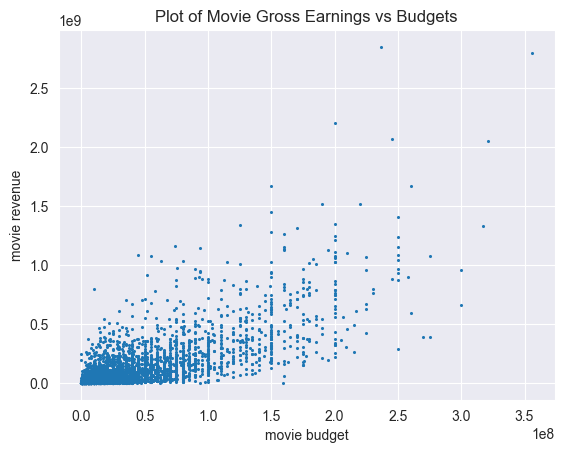

In [1057]:
# scatter plot to compare - plt
plt.scatter(data=movies_budget_gross, x='budget', y='gross', s=1.5)
plt.title('Plot of Movie Gross Earnings vs Budgets')
plt.xlabel('movie budget')
plt.ylabel('movie revenue')

plt.show()

#### *scatter plot with regression line - (using Seaborn library)*

Text(0.5, 1.0, 'Plot of Movie Gross Earnings vs Budgets')

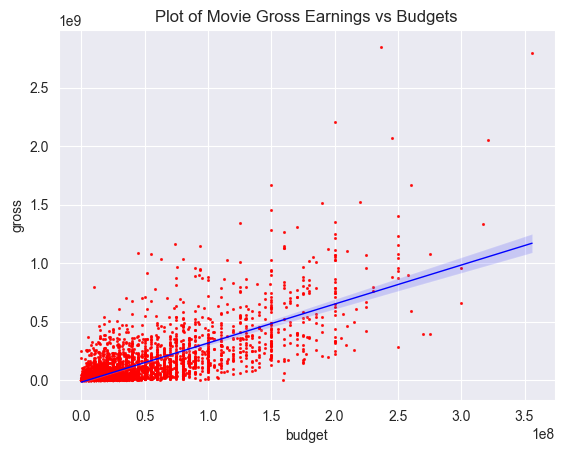

In [1058]:
# scatter plot to compare - seaborn
sns.regplot(data=movies_budget_gross, x='budget', y='gross', scatter_kws={'color':'red', 's':1.5}, line_kws={'color':'blue', 'linewidth':1})
plt.title('Plot of Movie Gross Earnings vs Budgets')

#### determine actual correlation

In [1059]:
# correlation matrix for all the numeric variables
movies_budget_gross.corr(numeric_only=True)

## budget and gross have a pretty high +ve correlation (0.740395)

,score,budget,gross,runtime,release_year,votes
score,1.000000,0.071792,0.222143,0.414580,0.061029,0.473809
budget,0.071792,1.000000,0.740395,0.318595,0.320245,0.440021
gross,0.222143,0.740395,1.000000,0.275596,0.268626,0.614904
runtime,0.414580,0.318595,0.275596,1.000000,0.074432,0.352437
release_year,0.061029,0.320245,0.268626,0.074432,1.000000,0.202883
votes,0.473809,0.440021,0.614904,0.352437,0.202883,1.000000


In [1060]:
# using different methods
# movies_budget_gross.corr(method='pearson', numeric_only=True)       # default

# movies_budget_gross.corr(method='kendall', numeric_only=True)

movies_budget_gross.corr(method='spearman', numeric_only=True)

,score,budget,gross,runtime,release_year,votes
score,1.000000,-0.010133,0.182857,0.413040,0.062508,0.495379
budget,-0.010133,1.000000,0.693670,0.330276,0.302558,0.493404
gross,0.182857,0.693670,1.000000,0.257121,0.340211,0.745815
runtime,0.413040,0.330276,0.257121,1.000000,0.094520,0.300959
release_year,0.062508,0.302558,0.340211,0.094520,1.000000,0.422187
votes,0.495379,0.493404,0.745815,0.300959,0.422187,1.000000


#### visualize correlation matrix

Text(50.58159722222221, 0.5, 'movie features')

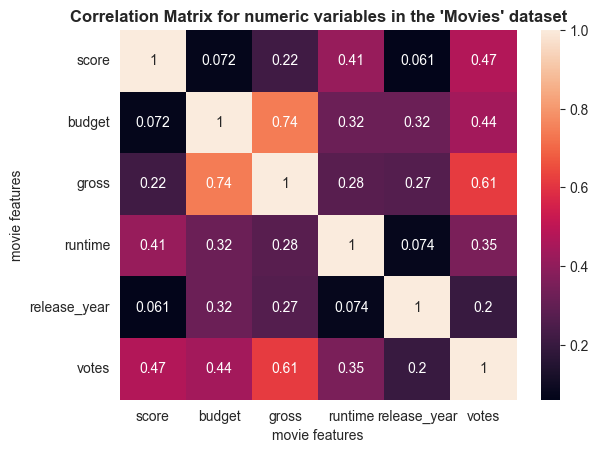

In [1061]:
corr_matrix = movies_budget_gross.corr(numeric_only=True)

sns.heatmap(data=corr_matrix, annot=True)
plt.title('Correlation Matrix for numeric variables in the \'Movies\' dataset', weight='bold')
plt.xlabel('movie features')
plt.ylabel('movie features')

### <u>Gross and Company Correlation</u>

#### investigate companies in dataset

In [1062]:
# find unique companies in dataset
movies_budget_gross['company'].unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Clubhouse Pictures (II)', '20th Century Studios',
       'Beijing Diqi Yinxiang Entertainment'], dtype=object)

In [1063]:
# create a df of companies and their value counts to see the top companies (get the 1st 20 most popular companies in the dataset)
company_valuecounts_df = movies_budget_gross['company'].value_counts().reset_index().reset_index().\
    rename(columns={'level_0':'index', 'index':'company', 'company':'value_counts'}).head(20)
company_valuecounts_df

,index,company,value_counts
0,0,Universal Pictures,330
1,1,Columbia Pictures,302
2,2,Warner Bros.,299
3,3,Paramount Pictures,279
4,4,Twentieth Century Fox,209
5,5,New Line Cinema,156
6,6,Walt Disney Pictures,107
7,7,Touchstone Pictures,105
8,8,Metro-Goldwyn-Mayer (MGM),99
9,9,Dreamworks Pictures,75


#### create subset of movie data with just the 20 most popular companies

In [1064]:
# want a subset of the movies_budget_gross data where the company names are the company names in company_valuecounts_df
movies_budget_gross_top_companies = movies_budget_gross[movies_budget_gross['company'].isin(company_valuecounts_df['company'])]
movies_budget_gross_top_companies

,name,genre,score,rating,budget,gross,runtime,release_year,release_date,release_country,votes,company,director,writer,star,country
0,The Shining,Drama,8.4,R,19000000,46998772,146.0,1980,1980-06-13,United States,927000.0,Warner Bros.,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom
1,The Blue Lagoon,Adventure,5.8,R,4500000,58853106,104.0,1980,1980-07-02,United States,65000.0,Columbia Pictures,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States
3,Airplane!,Comedy,7.7,PG,3500000,83453539,88.0,1980,1980-07-02,United States,221000.0,Paramount Pictures,Jim Abrahams,Jim Abrahams,Robert Hays,United States
4,Caddyshack,Comedy,7.3,R,6000000,39846344,98.0,1980,1980-07-25,United States,108000.0,Orion Pictures,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States
5,Friday the 13th,Horror,6.4,R,550000,39754601,95.0,1980,1980-05-09,United States,123000.0,Paramount Pictures,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7643,Tenet,Action,7.4,PG-13,205000000,363656624,150.0,2020,2020-09-03,United States,387000.0,Warner Bros.,Christopher Nolan,Christopher Nolan,John David Washington,United States
7646,The Invisible Man,Drama,7.1,R,7000000,143151000,124.0,2020,2020-02-28,United States,186000.0,Universal Pictures,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada
7648,Bad Boys for Life,Action,6.6,R,90000000,426505244,124.0,2020,2020-01-17,United States,140000.0,Columbia Pictures,Adil El Arbi,Peter Craig,Will Smith,United States
7649,Sonic the Hedgehog,Action,6.5,PG,85000000,319715683,99.0,2020,2020-02-14,United States,102000.0,Paramount Pictures,Jeff Fowler,Pat Casey,Ben Schwartz,United States


In [1065]:
movies_budget_gross_top_companies['company'].unique()
# len(movies_budget_gross_top_companies['company'].unique())

array(['Warner Bros.', 'Columbia Pictures', 'Paramount Pictures',
       'Orion Pictures', 'Universal Pictures', 'Twentieth Century Fox',
       'Metro-Goldwyn-Mayer (MGM)', 'New Line Cinema',
       'Touchstone Pictures', 'TriStar Pictures', 'Walt Disney Pictures',
       'Castle Rock Entertainment', 'Miramax', 'Dimension Films',
       'Fox 2000 Pictures', 'Fox Searchlight Pictures',
       'Dreamworks Pictures', 'Screen Gems', 'Summit Entertainment',
       'Lionsgate'], dtype=object)

In [1066]:
# mask company names in the movies_budget_gross_top_companies df with int values
mask_dict = dict(zip(company_valuecounts_df['company'], company_valuecounts_df['index']))
movies_budget_gross_top_companies['company'] = movies_budget_gross_top_companies['company'].replace(mask_dict)
movies_budget_gross_top_companies

C:\Users\WangarY\AppData\Local\Temp\ipykernel_47588\3786908929.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_budget_gross_top_companies['company'] = movies_budget_gross_top_companies['company'].replace(mask_dict)


,name,genre,score,rating,budget,gross,runtime,release_year,release_date,release_country,votes,company,director,writer,star,country
0,The Shining,Drama,8.4,R,19000000,46998772,146.0,1980,1980-06-13,United States,927000.0,2,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom
1,The Blue Lagoon,Adventure,5.8,R,4500000,58853106,104.0,1980,1980-07-02,United States,65000.0,1,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States
3,Airplane!,Comedy,7.7,PG,3500000,83453539,88.0,1980,1980-07-02,United States,221000.0,3,Jim Abrahams,Jim Abrahams,Robert Hays,United States
4,Caddyshack,Comedy,7.3,R,6000000,39846344,98.0,1980,1980-07-25,United States,108000.0,18,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States
5,Friday the 13th,Horror,6.4,R,550000,39754601,95.0,1980,1980-05-09,United States,123000.0,3,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7643,Tenet,Action,7.4,PG-13,205000000,363656624,150.0,2020,2020-09-03,United States,387000.0,2,Christopher Nolan,Christopher Nolan,John David Washington,United States
7646,The Invisible Man,Drama,7.1,R,7000000,143151000,124.0,2020,2020-02-28,United States,186000.0,0,Leigh Whannell,Leigh Whannell,Elisabeth Moss,Canada
7648,Bad Boys for Life,Action,6.6,R,90000000,426505244,124.0,2020,2020-01-17,United States,140000.0,1,Adil El Arbi,Peter Craig,Will Smith,United States
7649,Sonic the Hedgehog,Action,6.5,PG,85000000,319715683,99.0,2020,2020-02-14,United States,102000.0,3,Jeff Fowler,Pat Casey,Ben Schwartz,United States


In [1067]:
movies_budget_gross_top_companies['company'].unique()
movies_budget_gross_top_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 7650
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             2516 non-null   object        
 1   genre            2516 non-null   object        
 2   score            2516 non-null   float64       
 3   rating           2514 non-null   object        
 4   budget           2516 non-null   int64         
 5   gross            2516 non-null   int64         
 6   runtime          2516 non-null   float64       
 7   release_year     2516 non-null   int64         
 8   release_date     2516 non-null   datetime64[ns]
 9   release_country  2516 non-null   object        
 10  votes            2516 non-null   float64       
 11  company          2516 non-null   int64         
 12  director         2516 non-null   object        
 13  writer           2516 non-null   object        
 14  star             2516 non-null   object 

#### plot scatterplot of gross vs company

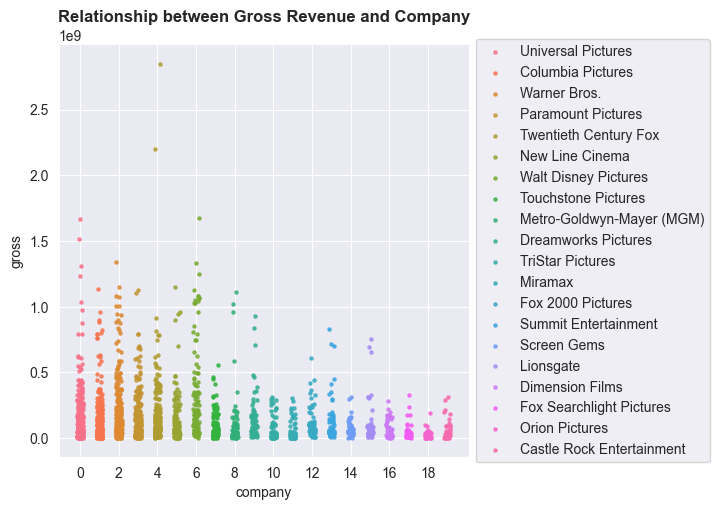

In [1068]:
# sns.set_style('darkgrid')
lm = sns.lmplot(data=movies_budget_gross_top_companies, x='company', y='gross', fit_reg=False, hue='company', legend=False, \
           x_jitter=0.15, y_jitter=0.15, scatter_kws={"s":5}) #, ,   , "alpha":0.2
plt.xticks([i for i in range(0,20,2)])
plt.title('Relationship between Gross Revenue and Company', weight='bold')
plt.legend(mask_dict, loc='center left', bbox_to_anchor=(1, 0.5))

### <u>General Correlation</u>

In [1069]:
movies_budget_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5436 entries, 0 to 7652
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             5436 non-null   object        
 1   genre            5436 non-null   object        
 2   score            5436 non-null   float64       
 3   rating           5424 non-null   object        
 4   budget           5436 non-null   int64         
 5   gross            5436 non-null   int64         
 6   runtime          5435 non-null   float64       
 7   release_year     5436 non-null   int64         
 8   release_date     5436 non-null   datetime64[ns]
 9   release_country  5436 non-null   object        
 10  votes            5436 non-null   float64       
 11  company          5434 non-null   object        
 12  director         5436 non-null   object        
 13  writer           5436 non-null   object        
 14  star             5436 non-null   object 

In [1070]:
movies_budget_gross.columns

Index(['name', 'genre', 'score', 'rating', 'budget', 'gross', 'runtime',
       'release_year', 'release_date', 'release_country', 'votes', 'company',
       'director', 'writer', 'star', 'country'],
      dtype='object')

#### Convert the non-numeric variables to the category data type 

In [1073]:
# create a copy of movies_budget_gross to give numerical values to
movies_budget_gross_num = movies_budget_gross   #.dropna()

# iterate thru the column name list
for column in movies_budget_gross_num.columns:
    # if the column data type is object 
    if movies_budget_gross_num[column].dtype == 'object':
        # change the data type to 'category'
        movies_budget_gross_num[column] = movies_budget_gross_num[column].astype('category')
        # have numerical codes associated with each category in each column
        movies_budget_gross_num[column] = movies_budget_gross_num[column].cat.codes

movies_budget_gross_num

,name,genre,score,rating,budget,gross,runtime,release_year,release_date,release_country,votes,company,director,writer,star,country
0,4706,6,8.4,6,19000000,46998772,146.0,1980,1980-06-13,47,927000.0,1432,1800,2841,700,46
1,3943,1,5.8,6,4500000,58853106,104.0,1980,1980-07-02,47,65000.0,454,1581,1160,215,47
2,3654,0,8.7,4,18000000,538375067,124.0,1980,1980-06-20,47,1200000.0,949,759,1822,1161,47
3,205,4,7.7,4,3500000,83453539,88.0,1980,1980-07-02,47,221000.0,1114,891,1416,1478,47
4,734,4,7.3,6,6000000,39846344,98.0,1980,1980-07-25,47,108000.0,1089,721,352,272,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,416,0,6.6,6,90000000,426505244,124.0,2020,2020-01-17,47,140000.0,454,17,2397,1819,47
7649,3569,0,6.5,4,85000000,319715683,99.0,2020,2020-02-14,47,102000.0,1114,854,2316,148,47
7650,1156,1,5.6,4,175000000,245487753,101.0,2020,2020-01-17,47,53000.0,1403,1814,2836,1474,47
7651,3992,1,6.8,4,135000000,111105497,100.0,2020,2020-02-21,47,42000.0,12,296,2096,641,6


#### visualize correlation matrix for all the variables in the movies dataset

Text(95.58159722222221, 0.5, 'movie features')

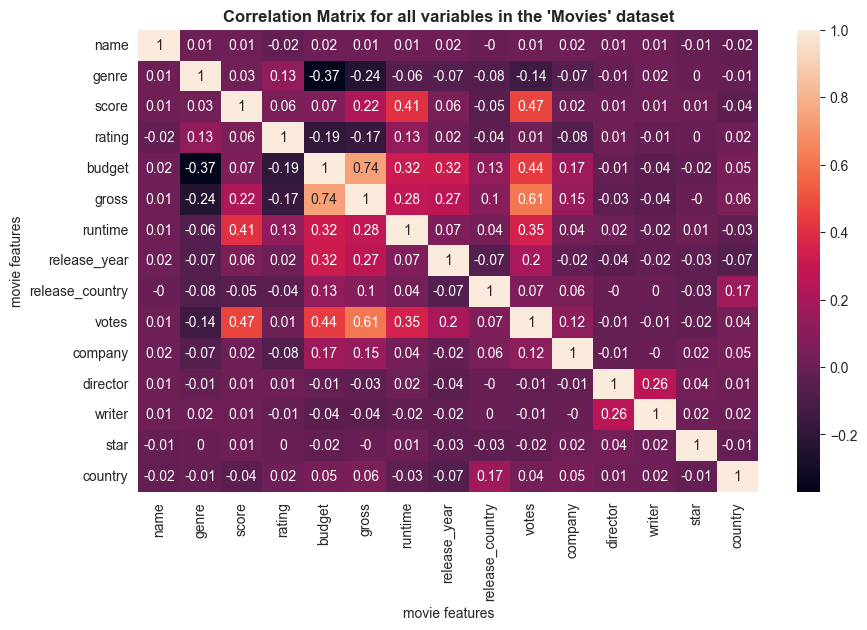

In [1081]:
corr_matrix_all = round(movies_budget_gross_num.corr(numeric_only=True), 2)

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data=corr_matrix_all, annot=True)
ax.set_title('Correlation Matrix for all variables in the \'Movies\' dataset', weight='bold')
ax.set_xlabel('movie features')
ax.set_ylabel('movie features')

In [1082]:
# unstack corr matrix
corr_matrix_all.unstack()

name     name        1.00
         genre       0.01
         score       0.01
         rating     -0.02
         budget      0.02
                     ... 
country  company     0.05
         director    0.01
         writer      0.02
         star       -0.01
         country     1.00
Length: 225, dtype: float64

In [1085]:
# sort unstacked matrix (sort variable pairs in asc order of correlation coefficients)
sorted_corr_coeff = corr_matrix_all.unstack().sort_values()
sorted_corr_coeff

budget   genre     -0.37
genre    budget    -0.37
gross    genre     -0.24
genre    gross     -0.24
budget   rating    -0.19
                    ... 
rating   rating     1.00
score    score      1.00
genre    genre      1.00
star     star       1.00
country  country    1.00
Length: 225, dtype: float64

In [1090]:
## determine pairs that have a high coeff of corr
# sorted_corr_coeff[sorted_corr_coeff > 0.5]
sorted_corr_coeff[(sorted_corr_coeff > 0.4) & (sorted_corr_coeff != 1)]

runtime  score      0.41
score    runtime    0.41
votes    budget     0.44
budget   votes      0.44
score    votes      0.47
votes    score      0.47
gross    votes      0.61
votes    gross      0.61
gross    budget     0.74
budget   gross      0.74
dtype: float64